<a href="https://colab.research.google.com/github/mehdii190/neural-network/blob/main/src/moons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **the moon** 

In [10]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import sklearn.datasets as db
import matplotlib.pyplot as plt

## dataset moon 

In [11]:
x , y = db.make_moons(200, noise=0.20)

In [12]:
print(x,"\n","label : \n",y)

[[ 1.90319116e+00  3.75147645e-01]
 [-8.63354411e-01  1.09613435e-01]
 [-5.97895333e-01  8.35569545e-01]
 [ 1.97132433e-01  1.08116191e+00]
 [ 8.16653561e-01  6.89073737e-01]
 [ 3.08254738e-02 -1.89244649e-01]
 [ 2.23737496e+00  4.94455514e-01]
 [ 8.67626819e-01  2.98016702e-01]
 [ 5.72214226e-01 -2.53163788e-01]
 [ 1.08628890e+00 -5.17432729e-01]
 [ 2.75912202e-01 -9.96826617e-02]
 [ 8.39680998e-01  9.22592428e-02]
 [-5.10794627e-01  1.05279553e+00]
 [-9.48841515e-02  1.19465509e+00]
 [ 3.84858767e-01  6.93740080e-01]
 [ 1.39025324e+00 -7.40427463e-01]
 [ 1.52974946e+00 -3.02587359e-01]
 [ 1.05417299e+00  3.44077577e-01]
 [ 5.68640815e-01 -1.33834900e-01]
 [-6.77443947e-01  8.05769883e-01]
 [ 1.40006415e-01  4.36506914e-01]
 [ 1.61553158e+00 -4.15570075e-02]
 [ 1.07186814e+00  4.71633706e-01]
 [ 3.51986509e-01 -7.59447466e-02]
 [ 2.09658196e+00  1.41726775e-01]
 [ 6.42957699e-01  8.42407758e-01]
 [ 7.66248982e-01 -9.03945610e-02]
 [-1.76927941e-04  9.49756865e-01]
 [ 1.52244053e-01  4

plot

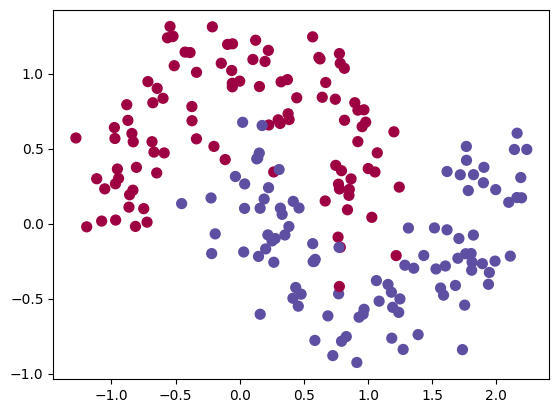

In [13]:
plt.scatter(x[:,0],x[:,1],s=50 , c = y , cmap = plt.cm.Spectral)
plt.show()

## ***array torch***

In [14]:
x = torch.FloatTensor(x)
y = torch.LongTensor(y)

In [ ]:
print(x , y)

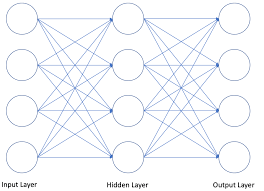

In [16]:
class FeedForward(torch.nn.Module):
  
  def __init__(self,input_neurons,hidden_neurons,output_neurons):
    super(FeedForward,self).__init__()
    self.hidden = nn.Linear(input_neurons,hidden_neurons)
    self.out = nn.Linear(hidden_neurons,output_neurons)

  def forward(self,x):
    x = self.hidden(x)
    x = F.relu(x)
    x = self.out(x)
    return x


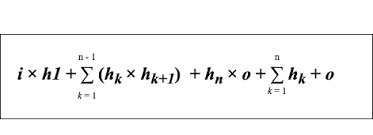

In [19]:
network = FeedForward(input_neurons = 2 ,hidden_neurons = 50 , output_neurons = 2)

optimizer = torch.optim.SGD(network.parameters(), lr = 0.02)
loss_function = torch.nn.CrossEntropyLoss()

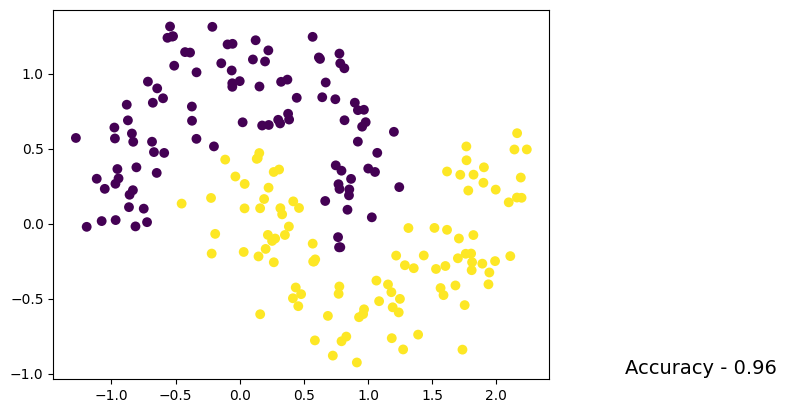

In [24]:
for epoch in range(10000):

  out= network(x)
  loss = loss_function(out,y)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if epoch % 1000 == 0:

    # show the learn process up until now

    max_value , prediction = torch.max(out,1)

    y_pred = prediction.data.numpy()

    y_target = y.data.numpy()
    plt.scatter(x.data.numpy()[:,0],x.data.numpy()[:,1] , s=50 , c = y_pred , lw = 0 )
    accuracy = (y_pred == y_target).sum() / y_target.size
    plt.text(3,-1 ,  "Accuracy - {:.2f}".format(accuracy),fontdict = {"size":14})
    plt.pause(0.1)
    break

  plt.ioff()
  plt.show()